In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

In [4]:
census= pd.read_csv('/Users/timothysmith/Downloads/censusblank.csv')
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
census.columns = [ 'Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num','Marital', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'income']
census.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   Education       48841 non-null  object
 4   Education-num   48841 non-null  int64 
 5   Marital         48841 non-null  object
 6   Occupation      48841 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Sex             48841 non-null  object
 10  Capital-gain    48841 non-null  int64 
 11  Capital-loss    48841 non-null  int64 
 12  Hours-per-week  48841 non-null  int64 
 13  Native-country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
census.keys()

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hours-per-week', 'Native-country', 'income'],
      dtype='object')

In [8]:
census.isin([' ?']).sum()

Age                  0
Workclass         2798
fnlwgt               0
Education            0
Education-num        0
Marital              0
Occupation        2808
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
income               0
dtype: int64

In [9]:
census_d=census.drop(['fnlwgt','Capital-gain','Capital-loss'],axis = 1)
census_d

,Age,Workclass,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K
48837,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,40,United-States,<=50K
48838,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
48839,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K


In [10]:
census = census[census["Workclass"] != " ?"]
census = census[census["Occupation"] != " ?"]
census = census[census["Native-country"] != " ?"]
census = census[census['Workclass'] != ' NaN']
census.head(3)

,Age,Workclass,fnlwgt,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [13]:
check_dup = census.duplicated().any() 
print("Are there any duplicated values in data? ",check_dup)

if check_dup:
    census = census.drop_duplicates()
else:
    print("There are not duplicated values in data.")

Are there any duplicated values in data?  False
There are not duplicated values in data.


In [14]:
census_nan= census.replace(' ?',np.nan) 
isMissingNow=census_nan.isna().any()
print(isMissingNow)

Age               False
Workclass         False
fnlwgt            False
Education         False
Education-num     False
Marital           False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital-gain      False
Capital-loss      False
Hours-per-week    False
Native-country    False
income            False
dtype: bool


In [15]:
census.shape

(45175, 15)

In [16]:
census_d.head()

,Age,Workclass,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [17]:
census_d.groupby('Education')['income'].count()
#HS-grads ususally has the highest proportion of people making more than 50k

Education
 10th             1389
 11th             1812
 12th              657
 1st-4th           247
 5th-6th           509
 7th-8th           955
 9th               756
 Assoc-acdm       1601
 Assoc-voc        2061
 Bachelors        8024
 Doctorate         594
 HS-grad         15784
 Masters          2657
 Preschool          83
 Prof-school       834
 Some-college    10878
Name: income, dtype: int64

In [491]:
census_d.groupby('Occupation')['income'].count()


Occupation
 Adm-clerical         5534
 Armed-Forces           14
 Craft-repair         6010
 Exec-managerial      5980
 Farming-fishing      1475
 Handlers-cleaners    2045
 Machine-op-inspct    2965
 Other-service        4805
 Priv-house-serv       230
 Prof-specialty       6001
 Protective-serv       975
 Sales                5405
 Tech-support         1419
 Transport-moving     2316
NaN                      1
Name: income, dtype: int64

In [18]:
census_d.groupby('Sex')['income'].count()

Sex
 Female    16192
 Male      32649
Name: income, dtype: int64

In [19]:
census['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
48835     <=50K
48836     <=50K
48838     <=50K
48839     <=50K
48840      >50K
Name: income, Length: 45175, dtype: object

In [20]:
corm = census.corr()
corm

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.075592,0.037267,0.079644,0.059252,0.101640
fnlwgt,-0.075592,1.000000,-0.041967,-0.004114,-0.004364,-0.018717
Education-num,0.037267,-0.041967,1.000000,0.126980,0.081726,0.146461
Capital-gain,0.079644,-0.004114,0.126980,1.000000,-0.032135,0.083861
Capital-loss,0.059252,-0.004364,0.081726,-0.032135,1.000000,0.054132
Hours-per-week,0.101640,-0.018717,0.146461,0.083861,0.054132,1.000000


count    45175.000000
mean        38.556502
std         13.215548
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64


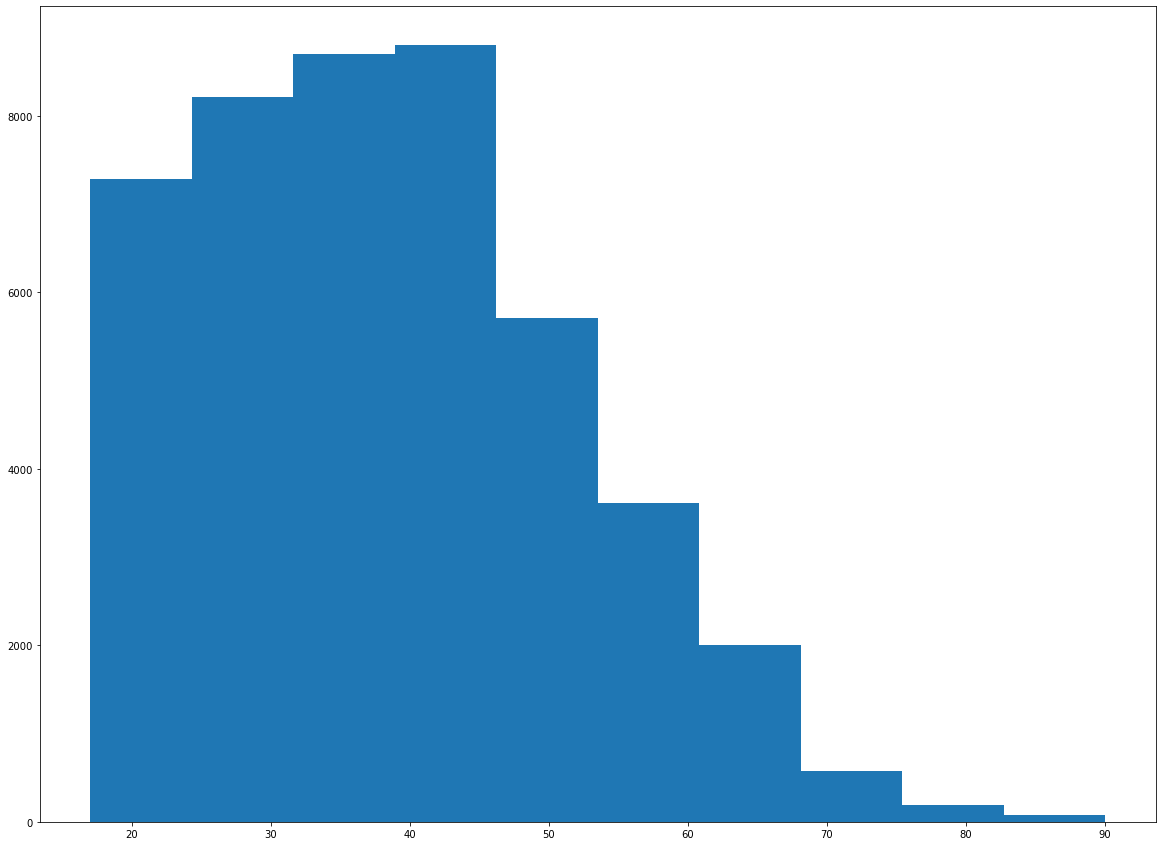

count        45175
unique           8
top        Private
freq         33262
Name: Workclass, dtype: object


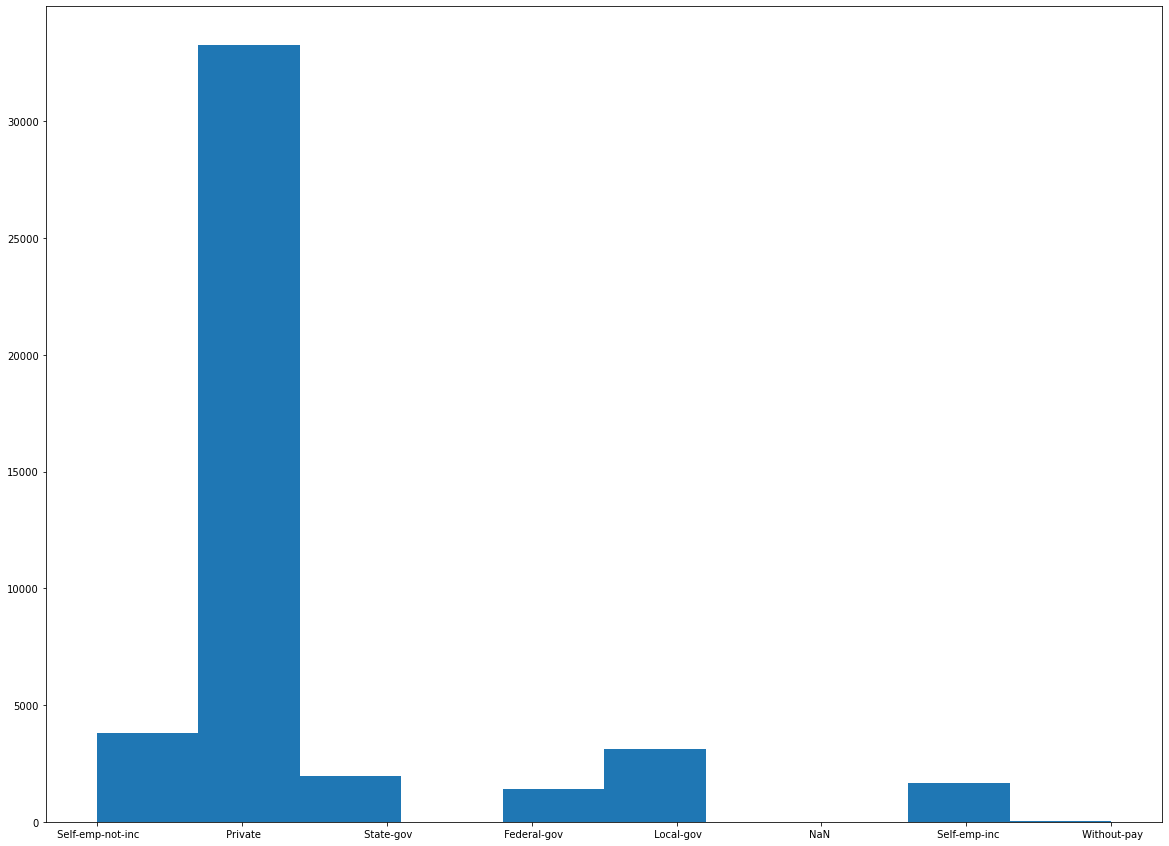

count    4.517500e+04
mean     1.897411e+05
std      1.056511e+05
min      1.349200e+04
25%      1.173930e+05
50%      1.783120e+05
75%      2.379030e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


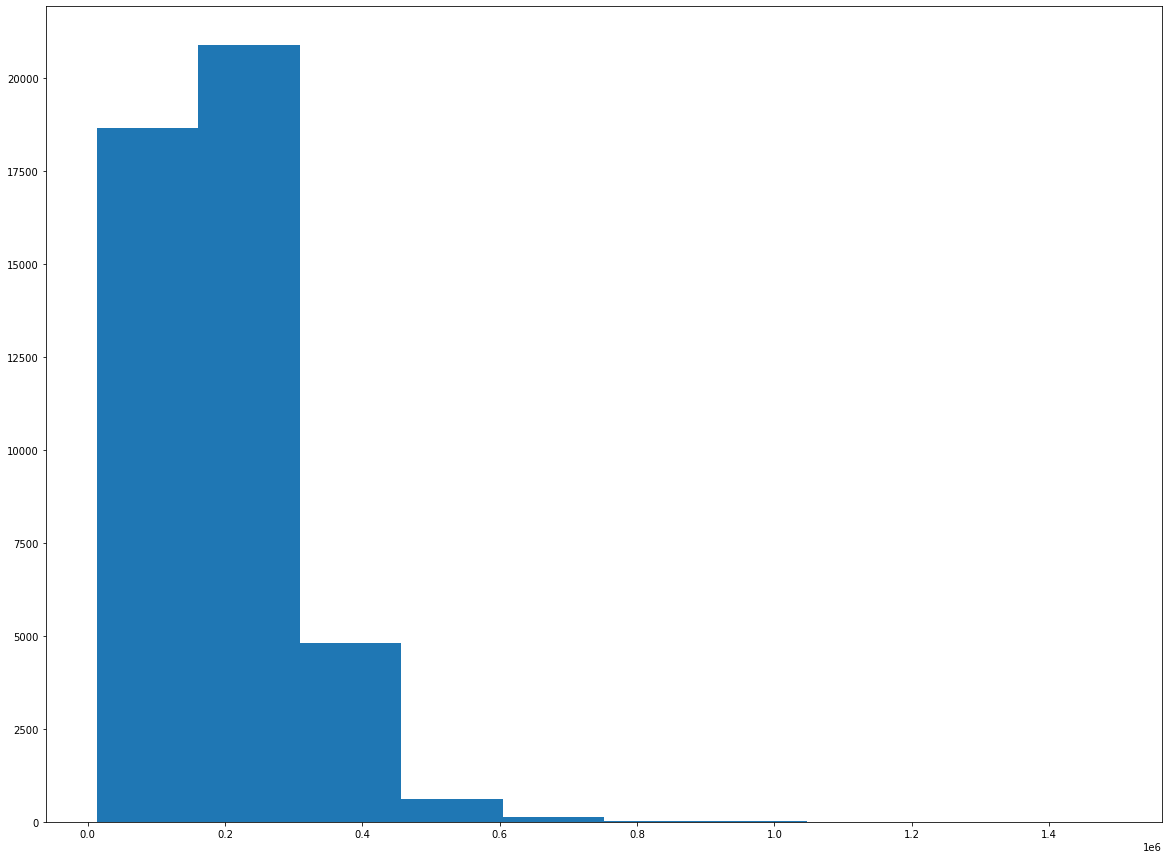

count        45175
unique          16
top        HS-grad
freq         14770
Name: Education, dtype: object


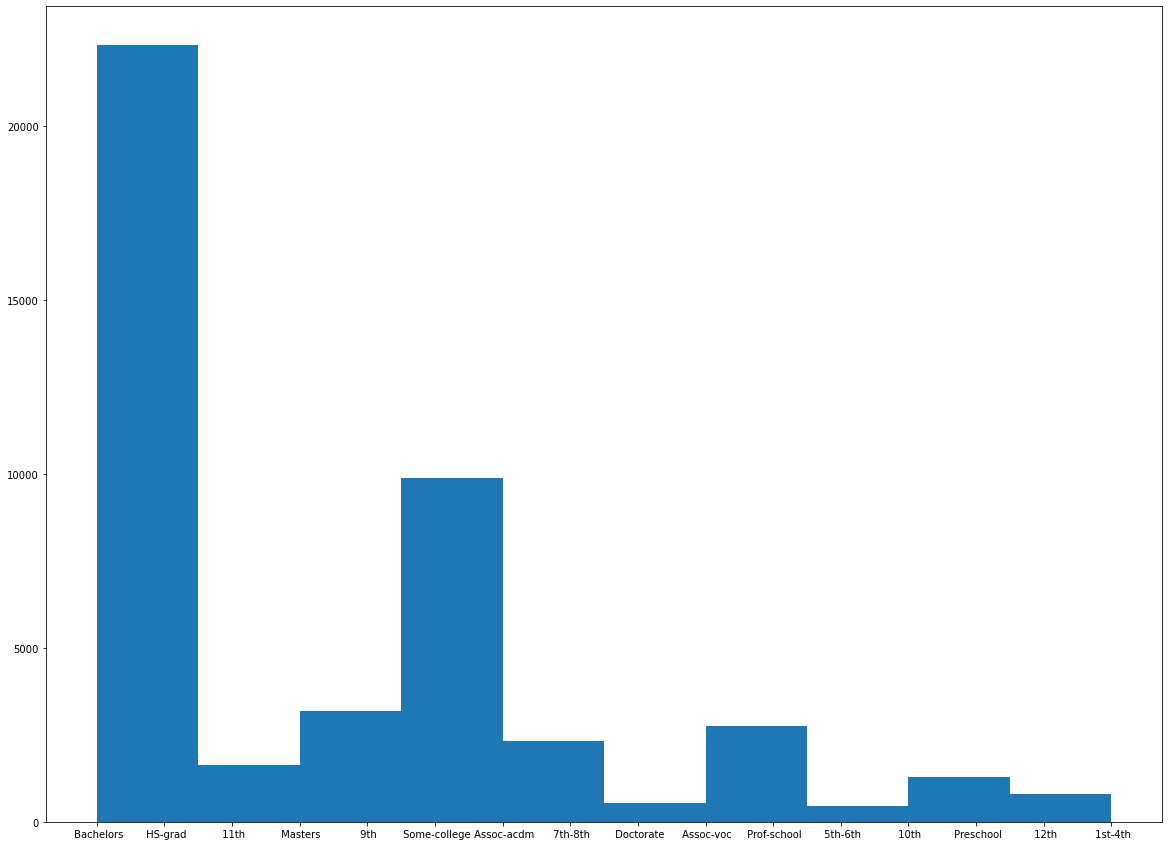

count    45175.000000
mean        10.119247
std          2.551704
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: Education-num, dtype: float64


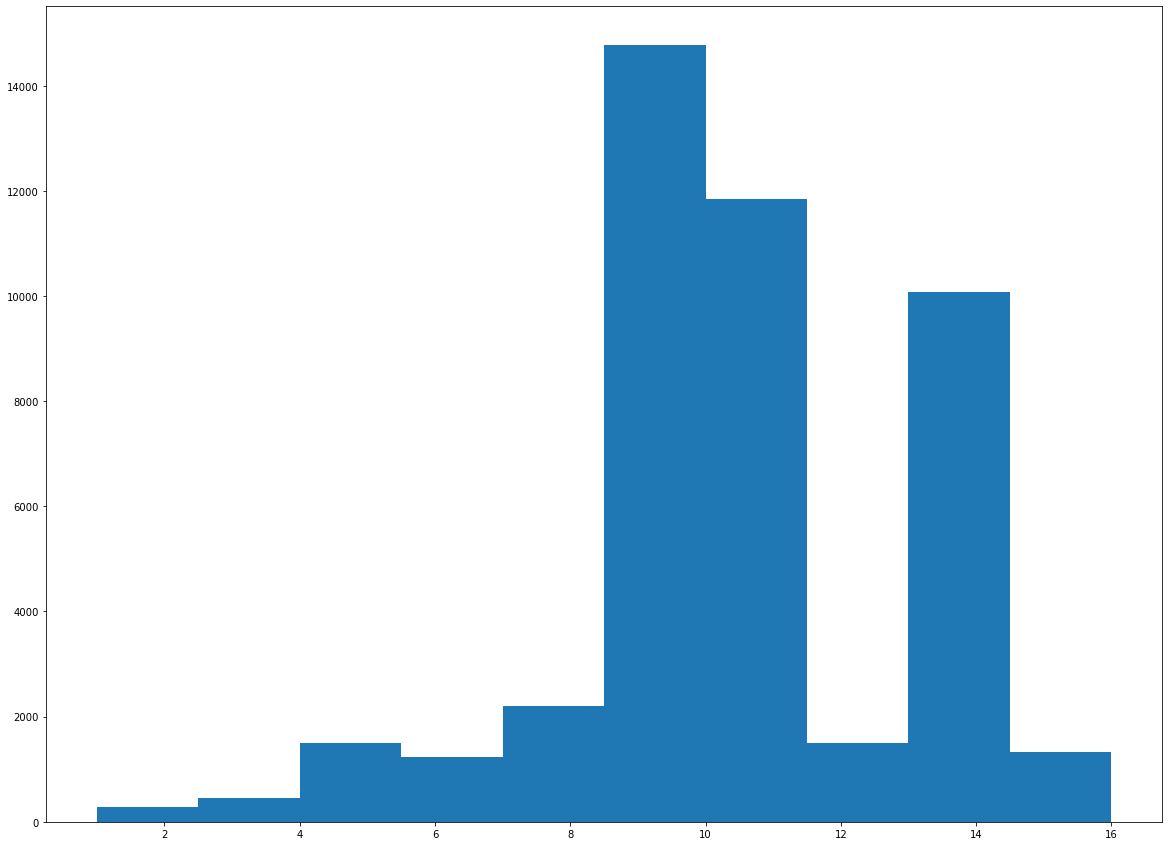

count                   45175
unique                      7
top        Married-civ-spouse
freq                    21043
Name: Marital, dtype: object


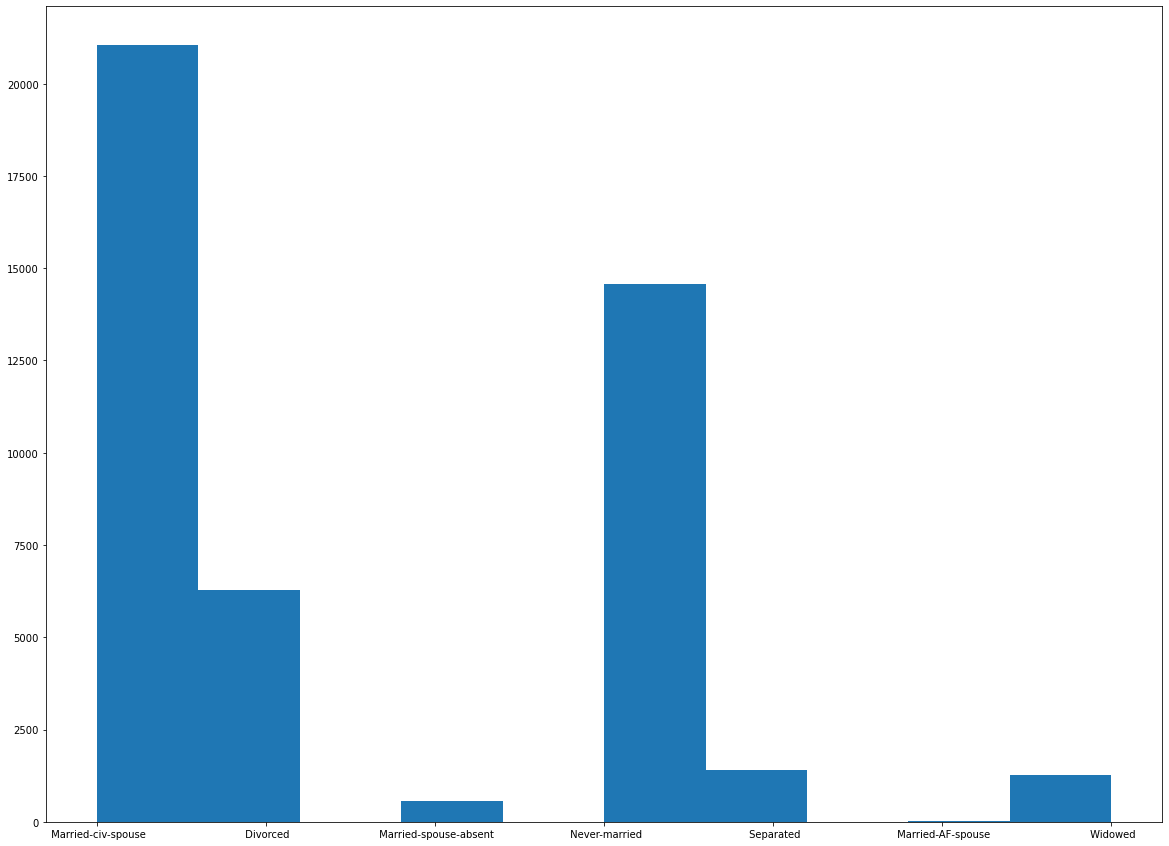

count             45175
unique               15
top        Craft-repair
freq               6010
Name: Occupation, dtype: object


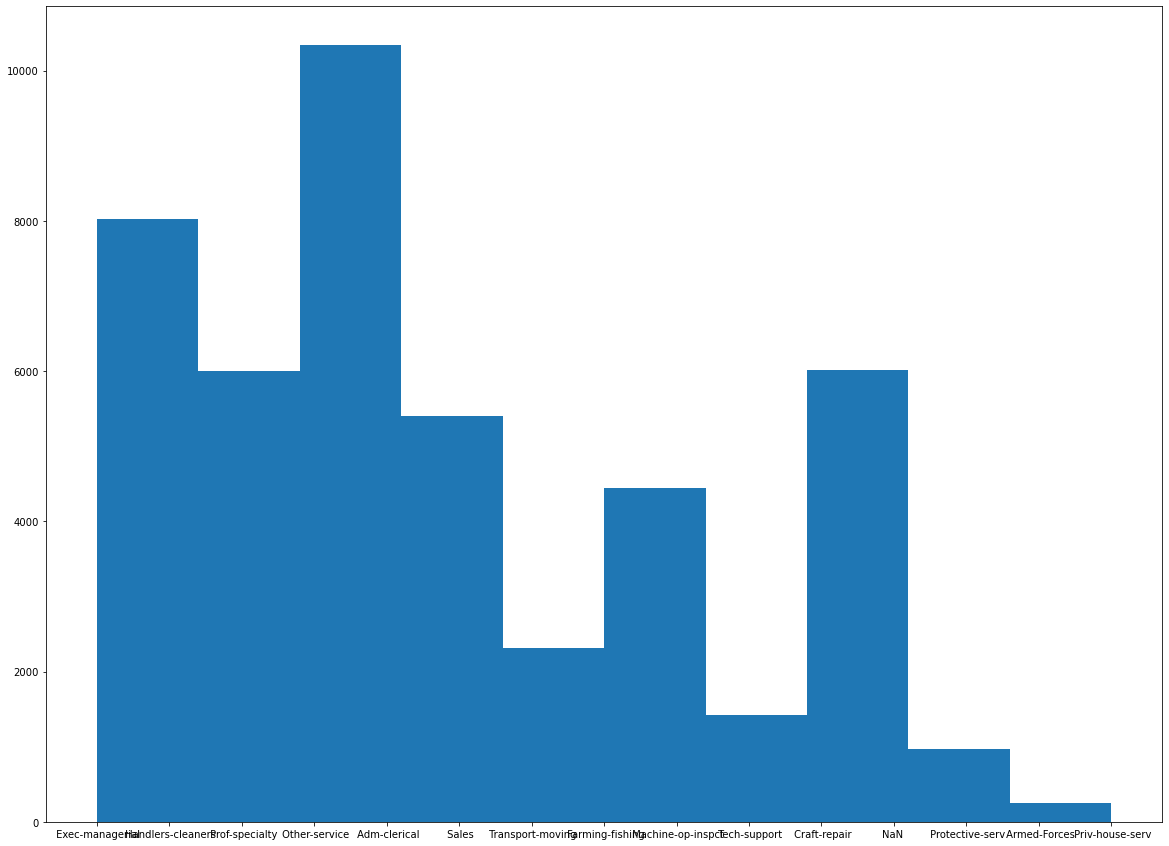

count        45175
unique           6
top        Husband
freq         18654
Name: Relationship, dtype: object


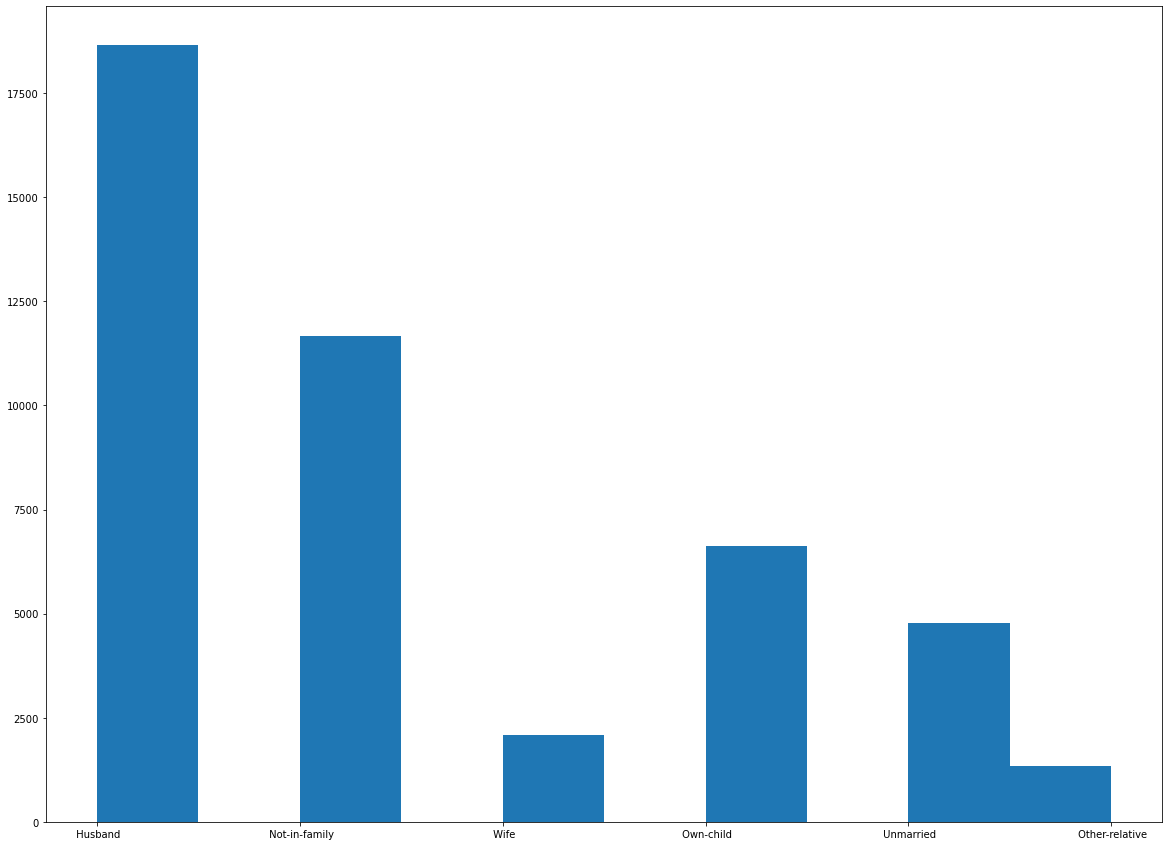

count      45175
unique         5
top        White
freq       38858
Name: Race, dtype: object


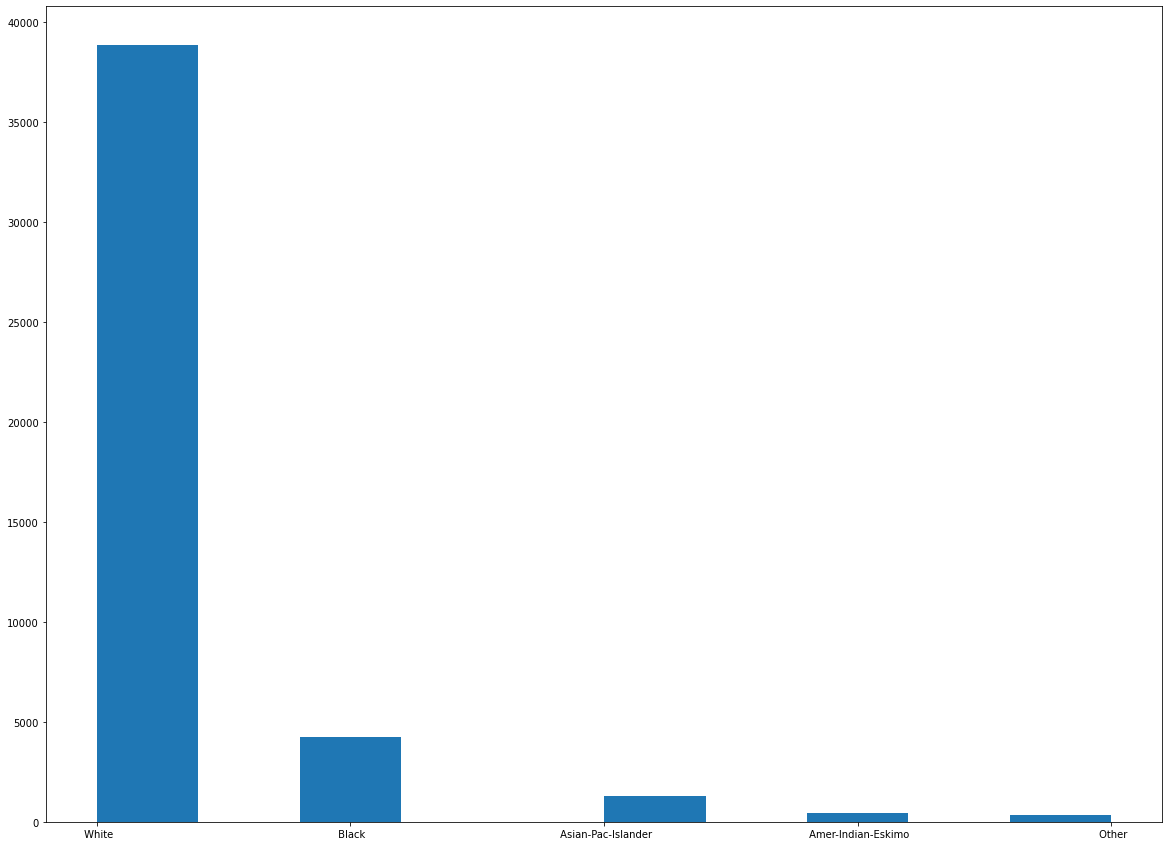

count     45175
unique        2
top        Male
freq      30495
Name: Sex, dtype: object


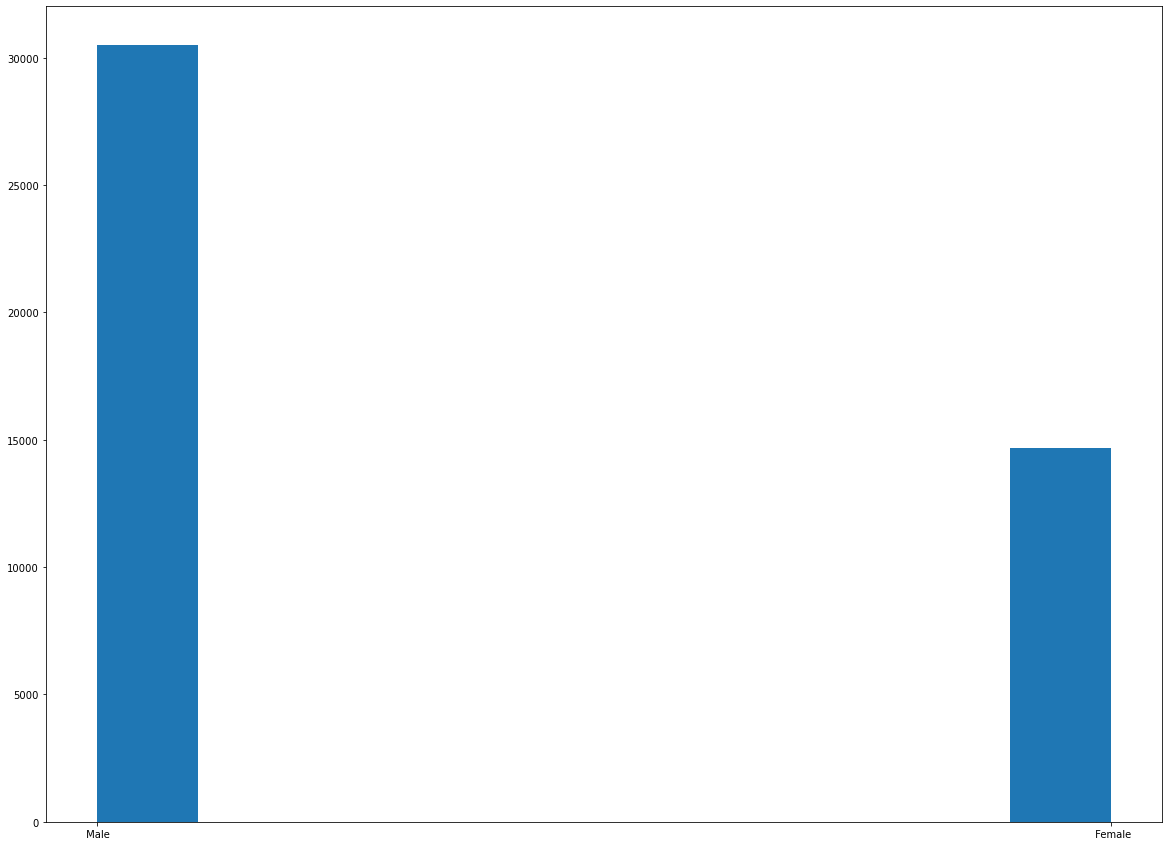

count    45175.000000
mean      1102.528146
std       7510.249976
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital-gain, dtype: float64


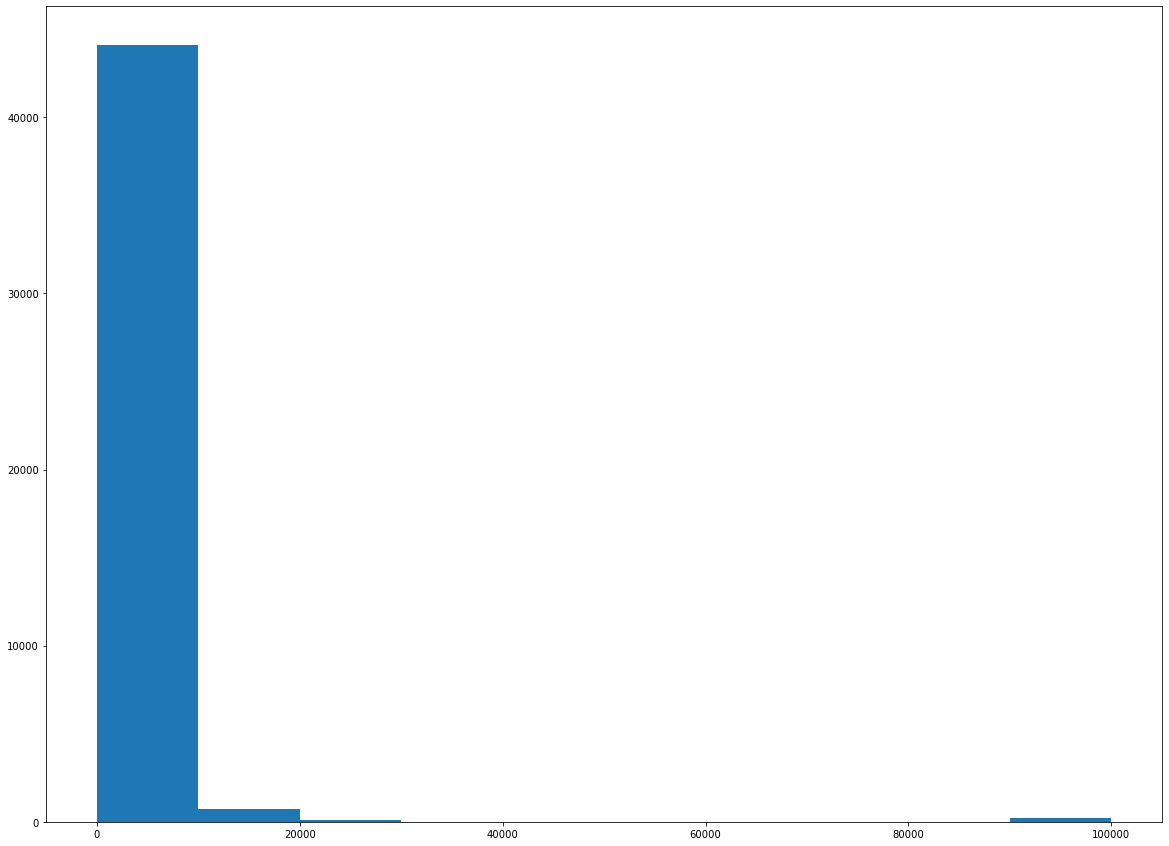

count    45175.000000
mean        88.687593
std        405.156611
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital-loss, dtype: float64


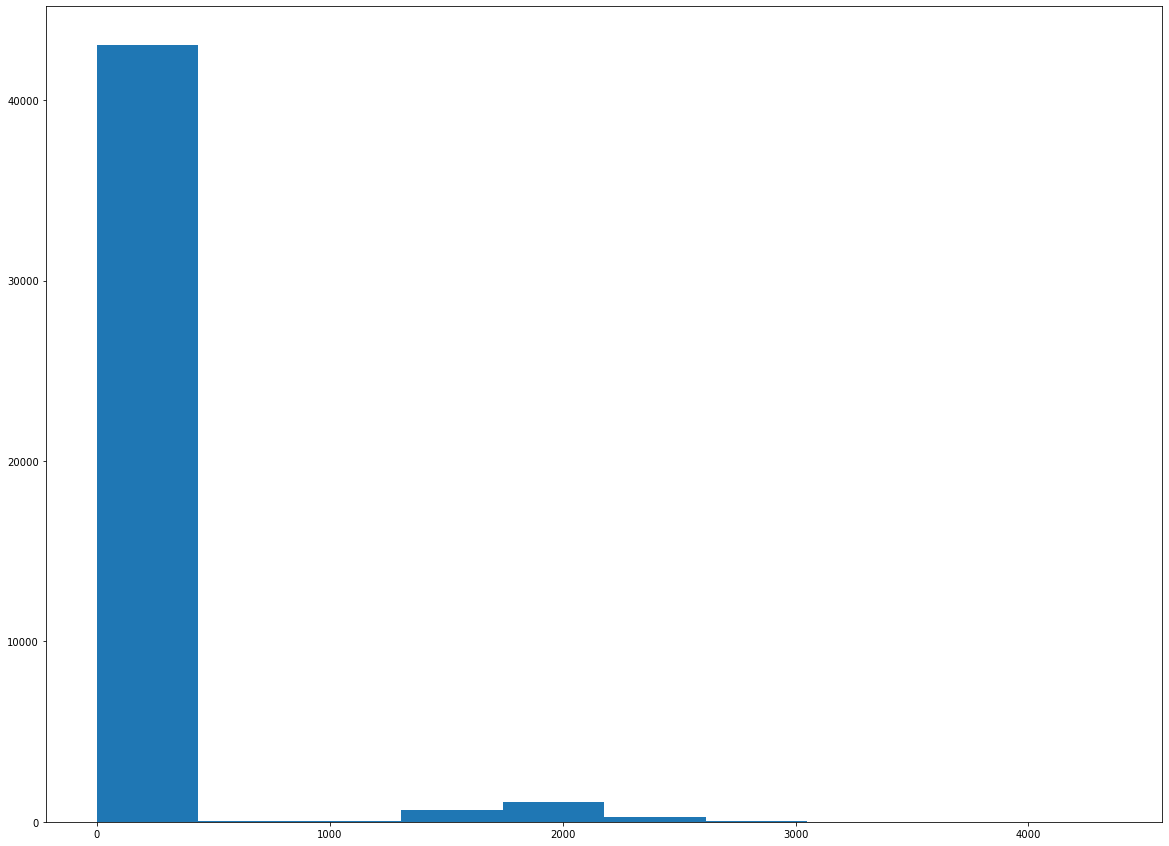

count    45175.000000
mean        40.942955
std         12.008064
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours-per-week, dtype: float64


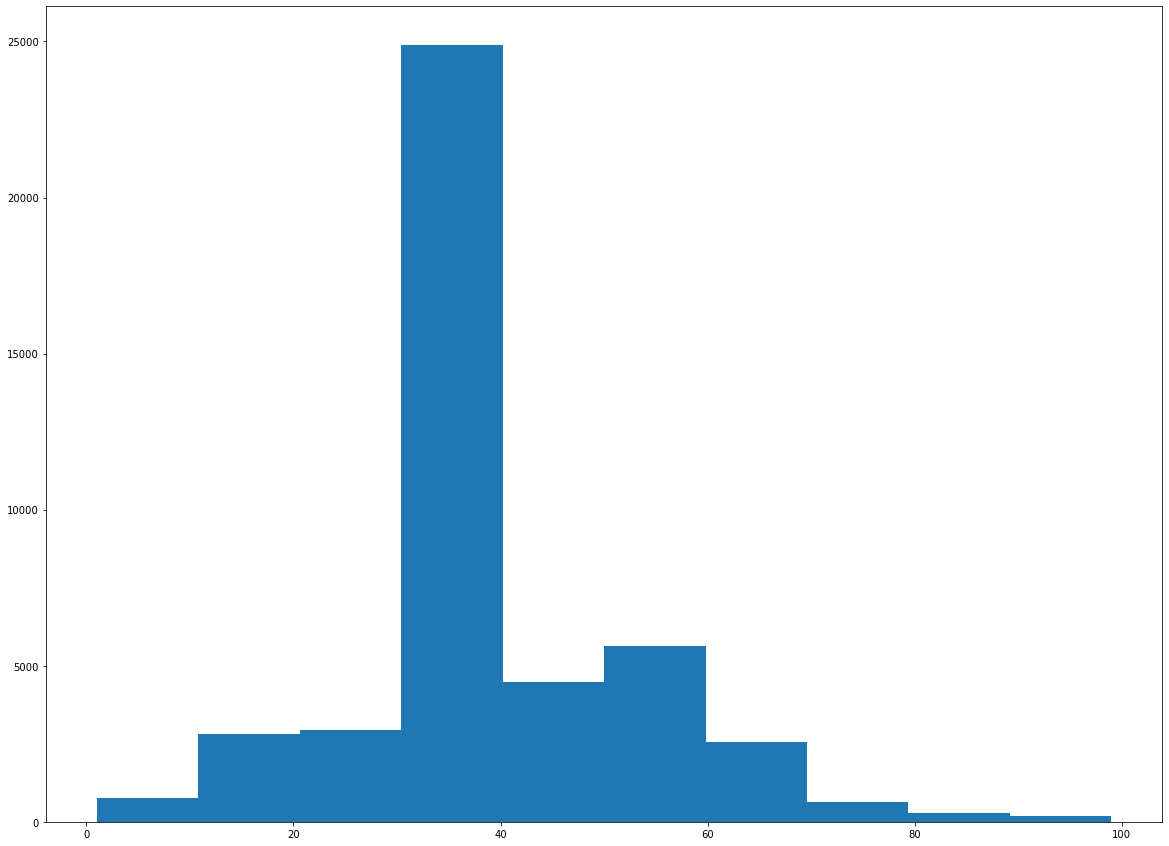

count              45175
unique                41
top        United-States
freq               41255
Name: Native-country, dtype: object


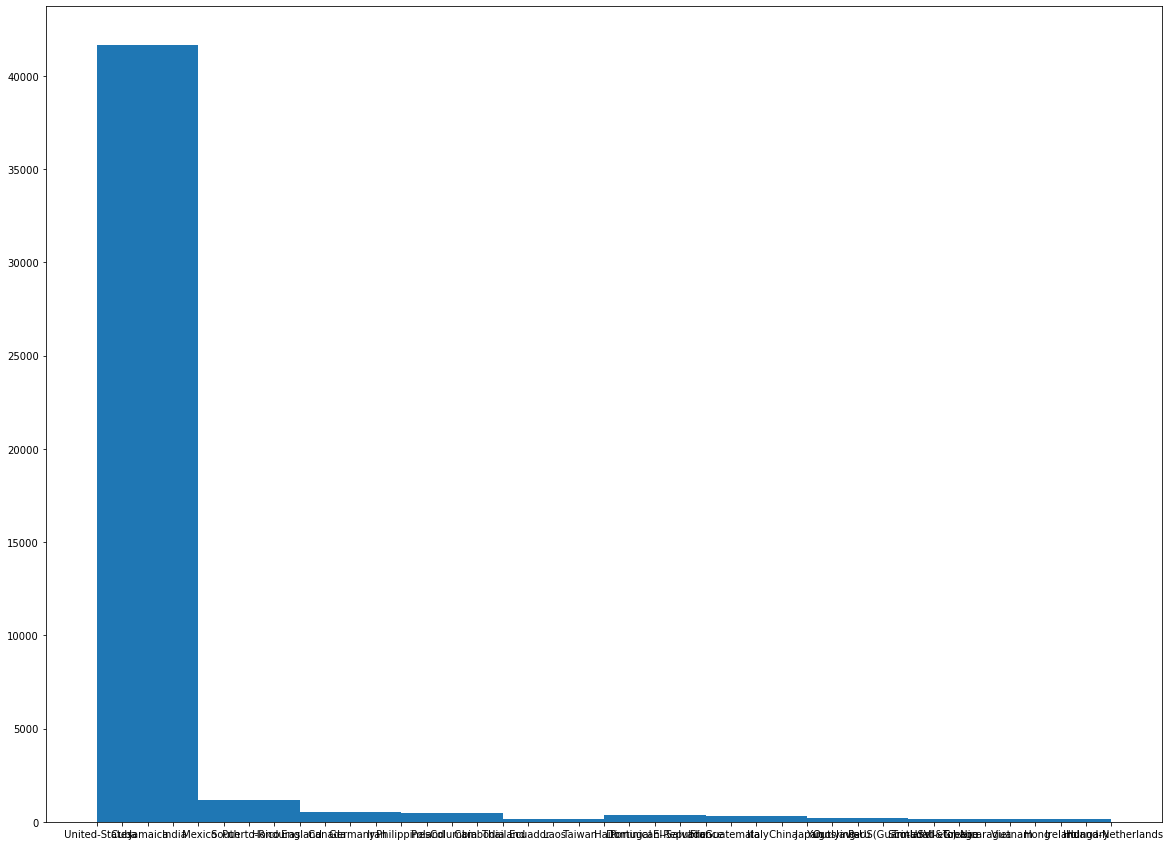

count      45175
unique         2
top        <=50K
freq       33972
Name: income, dtype: object


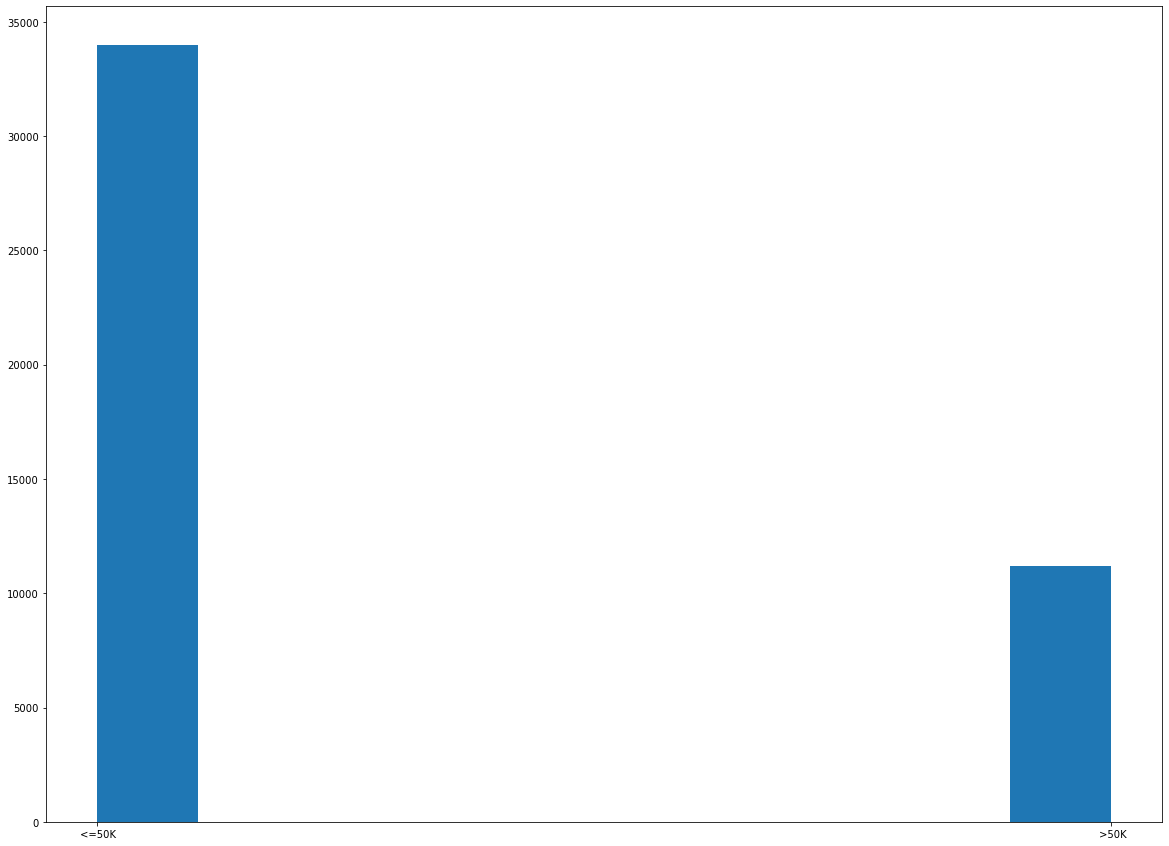

In [22]:
for col in census.columns:
    print(census[col].describe())
    plt.figure(figsize = (20,15))
    plt.hist(census[col])
    plt.show()

In [529]:
corm = census.corr()
corm

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,income
Age,1.000000,-0.075592,0.037267,0.079644,0.059252,0.101640,0.236873
fnlwgt,-0.075592,1.000000,-0.041967,-0.004114,-0.004364,-0.018717,-0.007244
Education-num,0.037267,-0.041967,1.000000,0.126980,0.081726,0.146461,0.332988
Capital-gain,0.079644,-0.004114,0.126980,1.000000,-0.032135,0.083861,0.221061
Capital-loss,0.059252,-0.004364,0.081726,-0.032135,1.000000,0.054132,0.148664
Hours-per-week,0.101640,-0.018717,0.146461,0.083861,0.054132,1.000000,0.227193
income,0.236873,-0.007244,0.332988,0.221061,0.148664,0.227193,1.000000


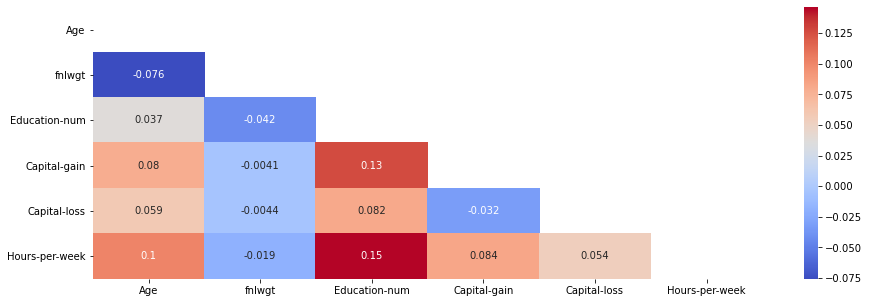

In [23]:
masko = np.zeros_like(corm, dtype=np.bool)
masko[np.triu_indices_from(masko)] = True

fig, axes = plt.subplots(figsize=(15, 5))
sns.heatmap(corm, mask = masko, cmap='coolwarm', annot=True)
plt.show()

In [24]:
numeric_subset = census.select_dtypes('number')
categorical_subset = census.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop(['income'])])
categorical_subset

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_NaN,Education_ 10th,Education_ 11th,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48836,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
X = categorical_subset.loc[:,categorical_subset.columns !='income'] 
X.head()


,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_NaN,Education_ 10th,Education_ 11th,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
census['income'] = census['income'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [27]:
y = census['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48835    0
48836    0
48838    0
48839    0
48840    1
Name: income, Length: 45175, dtype: int64

In [28]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

NameError: name 'df' is not defined

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(33881, 100)
(11294, 100)
(33881,)
(11294,)


In [31]:
dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy.fit(X_train, y_train)

ydummy_train = dummy.predict(X_train)
ydummy_train[0:5] 

array([0, 0, 0, 0, 0])

In [32]:
ydummy_test = dummy.predict(X_test)
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))

Confusion matrix for DummyClassifier is : 
 
 [[8459    0]
 [2835    0]]


In [33]:
print ('Accuracy score for DummyClassifier is : \n \n', accuracy_score(y_test, ydummy_test))

Accuracy score for DummyClassifier is : 
 
 0.7489817602266691


In [34]:
#Here we look to to fit and train the data to our model in order to test the actual possibilites that may be applied in 
#within a real world capacity. We first must train the model then apply it to test data.

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)

logr.fit(X_train, y_train)

/Users/timothysmith/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)
print ('First 8 Predictions for training data are: ', ypred_train_logr[:8])
print ('First 8 Predictions for test data are: ', ypred_test_logr[:8])

First 8 Predictions for training data are:  [0 0 0 0 0 0 0 0]
First 8 Predictions for test data are:  [0 0 0 0 1 0 0 0]


In [36]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')

confusion matrix for training data is : 
 [[23483  2030]
 [ 3817  4551]] 
 

confusion_matrix for test data is : 
 [[7838  621]
 [1270 1565]] 



In [37]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')


Accuracy for train data is : 
 0.8274254006670405 



In [38]:
#Train Data
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr ), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')

Recall for train data is : 
 0.543857552581262 

Precision for train data is : 
 0.6915362406929038 

f1-score for train data is : 
 0.6088701585390328 



In [39]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score

dummy = DummyClassifier(strategy = 'most_frequent', random_state=10)
dummy.fit(X_train, y_train)

ydummy_train = dummy.predict(X_train)
ydummy_train[0:5] # Most frequent case is 0 (Benign)

array([0, 0, 0, 0, 0])

In [40]:
#test data
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1-score for test data is : \n', f1_score(y_test,ypred_test_logr), '\n')

Accuracy for test data is : 
 0.832565964228794 

Recall for test data is : 
 0.5520282186948854 

Precision for test data is : 
 0.7159194876486734 

f1-score for test data is : 
 0.6233817964548896 



In [41]:
yprob_test_logr = logr.predict_proba(X_test)
yprob_test_logr[0:9,:].round(3)

array([[0.922, 0.078],
       [0.966, 0.034],
       [0.981, 0.019],
       [0.997, 0.003],
       [0.461, 0.539],
       [0.743, 0.257],
       [0.681, 0.319],
       [0.741, 0.259],
       [0.744, 0.256]])

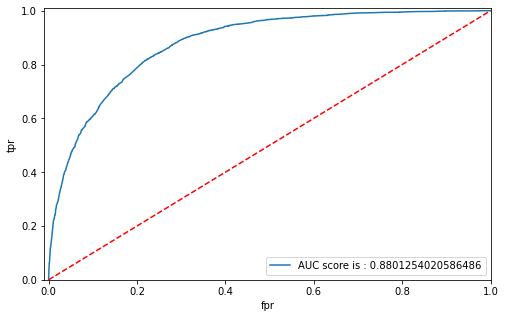

AUC Score for logistic regression is 0.8801254020586486


In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test_logr[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

In [43]:
# Here we look to look at the polynomoial features that may be opitmal in feature selection in relation to which population
#may  or may not contribute the most to incomes are more or less than 50k.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

logr_poly = LogisticRegression(random_state=0)

logr_poly.fit(X_train_poly,y_train)
ypred_train_logr_poly = logr_poly.predict(X_train_poly)
ypred_test_logr_poly = logr_poly.predict(X_test_poly)
yprob_test_logr_poly = logr_poly.predict_proba(X_test_poly)

/Users/timothysmith/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [428]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr_poly), '\n', '\n')
print ('confusion_matrix for test data with default threshold of 0.5 is : \n', confusion_matrix(y_test,ypred_test_logr_poly), '\n')
print ('confusion_matrix for test data with threshold od 0.2 is : \n', confusion_matrix(y_test,yprob_test_logr_poly[:,1] > 0.2), '\n')

confusion matrix for training data is : 
 [[23599  1914]
 [ 3610  4758]] 
 

confusion_matrix for test data with default threshold of 0.5 is : 
 [[7814  645]
 [1259 1576]] 

confusion_matrix for test data with threshold od 0.2 is : 
 [[5892 2567]
 [ 345 2490]] 



In [420]:
print ('AUC Score for logistic regression without polynomial features is', roc_auc_score(y_test,yprob_test_logr[:,1]))

AUC Score for logistic regression without polynomial features is 0.8801254020586486


In [421]:
print ('AUC Score for logistic regression with polynomial features is', roc_auc_score(y_test,yprob_test_logr_poly[:,1]))

AUC Score for logistic regression with polynomial features is 0.8767892978122713


In [ ]:
# Here we start  to investigate with the data with other models and how they may fair 

In [51]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) 
ypred_test_dt = dt.predict(X_test) 


print ('confusion matrix for training data for default threshold of 0.5  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshold of 0.5 is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

confusion matrix for training data for default threshold of 0.5  is : 
 [[23723  1790]
 [ 3014  5354]] 
 

confusion_matrix for test data for default threshold of 0.5 is : 
 [[7656  803]
 [1220 1615]] 



In [52]:
accuracy_score(y_train, ypred_train_dt)

0.8582096160089726

In [53]:
accuracy_score(y_test, ypred_test_dt)

0.8208783424827342

In [54]:
yprob_test_dt = dt.predict_proba(X_test) # probability predictions based on DecisionTree Classifier
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_dt), '\n') 
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_dt), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_dt), '\n')
print ('AUC score for test data with DT is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))

Accuracy for test data is : 
 0.8208783424827342 

Recall for test data is : 
 0.5696649029982364 

Precision for test data is : 
 0.6679073614557486 

AUC score for test data with DT is : 
 0.8341981959667264


In [45]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

ypred_train_rf = rf.predict(X_train) 
ypred_test_rf = rf.predict(X_test) 

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')

confusion matrix for training data for default threshold is : 
 [[23587  1926]
 [ 2878  5490]] 
 

confusion_matrix for test data for default threshold is : 
 [[7662  797]
 [1175 1660]] 



In [55]:
yprob_test_rf = rf.predict_proba(X_test) 

print ('Scores for default threshold value of: ', .5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_rf), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_rf), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_rf), '\n')
print ('AUC score for test data with RF is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

Scores for default threshold value of:  0.5 

Accuracy for test data is : 
 0.8253940145209846 

Recall for test data is : 
 0.5855379188712522 

Precision for test data is : 
 0.6756206756206756 

AUC score for test data with RF is : 
 0.8657564561335693


In [457]:
# Comparison of all AUC scores

In [56]:
auc_score = []
auc_score.append(roc_auc_score(y_test,yprob_test_logr[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_logr_poly[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_dt[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_rf[:,1]))
auc_scores = pd.Series(auc_score, index = ['Logistic', 'Logistic with Poly', 'DT', 'RF'])
auc_scores

Logistic              0.880125
Logistic with Poly    0.876789
DT                    0.834198
RF                    0.865756
dtype: float64

In [57]:
print ('Accuracy for Logistic is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Accuracy for Decision Tree data is : \n', accuracy_score(y_test,ypred_test_dt), '\n')
print ('Accuracy for Random Forest is : \n', accuracy_score(y_test,ypred_test_rf), '\n')


Accuracy for Logistic is : 
 0.832565964228794 

Accuracy for Decision Tree data is : 
 0.8208783424827342 

Accuracy for Random Forest is : 
 0.8253940145209846 



In [ ]:
# In conclusion , all models seem to have the data modeled pretty well when it comes to making right pedictions
#Based upon accuracy Logistic Regression scored the highest with the model fit.Honestly would have pegged decision tree
#to have the higher score of them all based upon how they quantify data.The parametrs employed were based on previos
#working numbers(.5),(.2) and details that were used will navigating through model training with python.These values
# have proven to bring out solid quatifiers when comparing dating and give opitmal results.In summary fitting this model 
#proved that to properly categorize and deliver the best solution to find which categories will  help 
#navigate and  solidify predicting the income >50k it is best use Logistic Regression